In [93]:
import pandas as pd
from utils.addTimeInformation import addTimeInformation
#from utils.calculateConsumption import calculateConsumption, getConsumptionYear
from utils.plotWeekDiagram import plotWeekDiagramm, create_week_comparison
from utils.read_CSV import getData
from utils.extraploation_class import Extrapolation

# VARIABLES
consumption_development_rate = 1.045
# VARIABLES END


def calculateConsumption(consumption_development_rate): 
    directory_yearly_consumption = getData("Verbrauch")

    for year in range(2024,2025):
        prev_year_df =directory_yearly_consumption.get(year-1).copy()    #Kopie des Dataframe des letzten Jahres
        extrapolated_data = Extrapolation(prev_year_df, year, None, None, None, consumption_development_rate)        #Erstellung eines neuen Objekts, mit einem DataFrame
        directory_yearly_consumption[extrapolated_data.year]= extrapolated_data.df   #DataFrame in das Erzeugungsverzeichnis gespeichert wird

    
    return directory_yearly_consumption


consumption_existing_years = calculateConsumption(consumption_development_rate)

Data für 2023 loaded succsessfully.


# Mit Lastprofilen

In [94]:
class Extrapolation_Consumption(Extrapolation):
    
    def __init__(self, df, year,  factor_OnShore=None, factor_OffShore=None, factor_Photo=None, factor_Consumption=None, lastprofil_dict=None):
        super().__init__(df, year, None, None, None, factor_Consumption=factor_Consumption)

        self.lastprofil = lastprofil_dict
        self.apply_lastprofile()
        addTimeInformation(self.df)  # Falls benötigt, kannst du diese Zeile wieder aktivieren

    def apply_lastprofile(self):
        weekend = ["6", "7"]  # Samstag und Sonntag
        workday = ["1", "2", "3", "4", "5"]  # Montag bis Freitag
        
    
        for idx, row in self.df.iterrows():
            weekday = row['Weekday']
            lp = None

           
            if weekday in weekend:
                lp = self.lastprofil['weekend']
            elif weekday in workday:
                lp = self.lastprofil['workday']
            else:
                continue

        
            # Berechnen Sie den Index im Lastprofil-DataFrame
            lastprofil_idx = idx % len(lp)

            # Fügen Sie den Wert aus dem Lastprofil-DataFrame hinzu
            self.df.loc[idx, 'Gesamtverbrauch'] += lp.loc[lastprofil_idx, 'lastprofil']


        #self.df.drop(columns=['Weekday'], inplace=True)

In [95]:
lastprofil_workday = pd.read_csv('CSV/Lastprofil/lastprofil_werktag.csv', delimiter= ';', thousands='.', decimal=',', dayfirst ="True") #, parse_dates=[[0,1]]
lastprofil_weekend = pd.read_csv('CSV/Lastprofil/lastprofil_wochenende.csv', delimiter= ';', thousands='.', decimal=',', dayfirst ="True") #, parse_dates=[[0,1]]
# Speichern der Lastprofile in einem Dictionary
lastprofile_dict = {
    'workday': lastprofil_workday,
    'weekend': lastprofil_weekend
}



def calculateConsumption_lastprofile(consumption_development_rate): 
   
    directory_yearly_consumption = getData("Verbrauch")

    for year in range(2024,2025):
        prev_year_df =directory_yearly_consumption.get(year-1).copy()    #Kopie des Dataframe des letzten Jahres
        extrapolated_data = Extrapolation_Consumption(prev_year_df, year, None, None, None, consumption_development_rate, lastprofile_dict)        #Erstellung eines neuen Objekts, mit einem DataFrame
        directory_yearly_consumption[extrapolated_data.year]= extrapolated_data.df   #DataFrame in das Erzeugungsverzeichnis gespeichert wird

    
    return directory_yearly_consumption


consumption_existing_years_lastprofile = calculateConsumption_lastprofile(consumption_development_rate)

Data für 2023 loaded succsessfully.


                    Datum  Gesamtverbrauch
12668 2024-05-13 00:00:00      11046.17250
12669 2024-05-13 00:15:00      11052.70375
12670 2024-05-13 00:30:00      10939.58250
12671 2024-05-13 00:45:00      10804.77750
12672 2024-05-13 01:00:00      10624.51500
...                   ...              ...
13335 2024-05-19 22:45:00      11420.54375
13336 2024-05-19 23:00:00      11198.22000
13337 2024-05-19 23:15:00      11008.03000
13338 2024-05-19 23:30:00      10793.28250
13339 2024-05-19 23:45:00      10656.38750

[672 rows x 2 columns]
                    Datum  Gesamtverbrauch
12668 2024-05-13 00:00:00      21165.67250
12669 2024-05-13 00:15:00      20913.95375
12670 2024-05-13 00:30:00      20586.83250
12671 2024-05-13 00:45:00      20269.52750
12672 2024-05-13 01:00:00      20297.51500
...                   ...              ...
13335 2024-05-19 22:45:00      22131.79375
13336 2024-05-19 23:00:00      22010.97000
13337 2024-05-19 23:15:00      21679.03000
13338 2024-05-19 23:30:00     

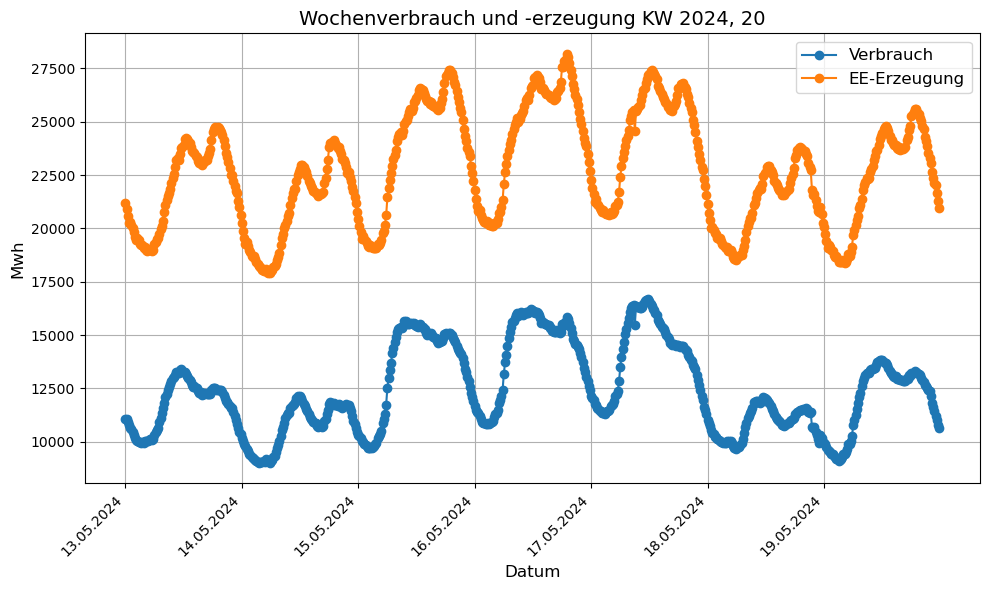

In [96]:
selected_week = '20'
selected_year = '2024'



def get_weekly_consumption(consumption_data, selected_year, selected_week):
    # Erstelle einen DataFrame aus dem Dictionary
    yearly_consumption = pd.DataFrame.from_dict(consumption_data.get(int(selected_year)))

    # Filtere die Daten für die angegebene Woche und das Jahr
    week_filtered_data_consumption = yearly_consumption[
        (yearly_consumption['Week'] == selected_week)
    ]

    # Erstelle einen DataFrame nur mit Datum und Gesamtverbrauch
    week_consumption_df = week_filtered_data_consumption[['Datum', 'Gesamtverbrauch']]
    week_consumption_df.loc[:, 'Datum'] = pd.to_datetime(week_consumption_df['Datum'])

    return week_consumption_df


# Verwende die Funktion für consumption_existing_years
week_consumption_df = get_weekly_consumption(consumption_existing_years, selected_year, selected_week)

# Verwende die Funktion für consumption_existing_years_lastprofile
week_consumption_df_lp = get_weekly_consumption(consumption_existing_years_lastprofile, selected_year, selected_week)

print(week_consumption_df)
print(week_consumption_df_lp)

# didirectory_yearly_generation and consumption_existing_years are dicitionaries

create_week_comparison(selected_week, selected_year, week_consumption_df, week_consumption_df_lp)